# 4、练习聚类



In [ ]:
# 难度：
# 5到官网教程练习更多的算法接口，原理
# https://scikit-learn.org/dev/tutorial/  （比如实战DBSCAN）
# 6 到kaggele和天池下载数据集，通过决策树，随机森林，线性回归，梯度下降，岭回归等进行实战，调参等，
# 看看不同算法解决同一个问题时的差异，以及调参后的效果
# 7 svm的原理可以看看B站这个博主的讲解，讲的不错 https://www.bilibili.com/video/BV1Hs411w7ci

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# 读取四张表的数据
#读取了订单和产品id的关联，csv比较大
prior = pd.read_csv("../MachineData/data/instacart/order_products__prior.csv")

In [3]:
#产品id，与过道的对应
products = pd.read_csv("../MachineData/data/instacart/products.csv")

In [4]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("../MachineData/data/instacart/orders.csv")

In [5]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("../MachineData/data/instacart/aisles.csv")

In [6]:
prior.head()  #订单中有哪些产品

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
products.head() #产品id，产品名称，过道id

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
orders.head() #订单id，用户id

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
aisles.head() #过道id，放了哪些产品类别

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
# 合并四张表到一张表  （用户-物品类别）
#订单表和产品表关联
#用户买了哪些订单，订单里面有哪些产品，产品对应的过道，过道对应的产品类别
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [11]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [12]:
mt.shape

(32434489, 14)

In [13]:
#crosstab 交叉表，特殊的分组工具
# 交叉表（特殊的分组工具），如果在这一步内存不够了，重启一下jupyter
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [14]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [15]:
#针对20万用户，有134个特征
cross.shape

(206209, 134)

In [16]:
type(cross)

pandas.core.frame.DataFrame

In [17]:
# 进行主成分分析,那么大家还记得不？，保留90%的成分，实际特征数目减少了几倍，134--》27
pca = PCA(n_components=0.9)


In [18]:
data = pca.fit_transform(cross)  #还记得fit_transform的作用不？
data.shape

(206209, 27)

In [19]:
type(data)

numpy.ndarray

In [20]:
# 把样本数量减少
x = data[:500]
x.shape

(500, 27)

In [21]:
x

array([[-24.21565874,   2.4294272 ,  -2.46636975, ...,   0.68680034,
          1.69439402,  -2.34323022],
       [  6.46320806,  36.75111647,   8.38255336, ...,   4.12121252,
          2.4468974 ,  -4.28348478],
       [ -7.99030162,   2.40438257, -11.03006405, ...,   1.77534453,
         -0.44419403,   0.78666557],
       ...,
       [-11.92661183,  -6.28156437,   6.49043833, ...,  -0.93499096,
         -0.1409791 ,   0.04370174],
       [-18.05675245,  -0.42589035,  -3.92660866, ...,  -1.02048351,
         -0.95283767,   0.90135767],
       [-24.62244434,  -0.5635177 ,  -0.90551124, ...,   0.86904501,
         -2.15569229,  -0.40915483]])

In [22]:
x.max()

407.18563418250574

In [23]:
x.min()

-242.34847949305856

In [24]:
# 假设用户一共分为四个类别
#n_clusters是分为几个类别，是主要的超参
km = KMeans(n_clusters=4)

In [25]:
import time
start= time.time()
km.fit(x)  #开始训练
end= time.time()
print("聚类的训练时间：", end-start)

聚类的训练时间： 0.0763540267944336


D:\PY\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
#开始预测
predict = km.predict(x)

In [27]:
predict  #预测得到的是每一个样本的类别

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
import numpy as np
np.unique(predict)

array([0, 1, 2, 3])

In [29]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

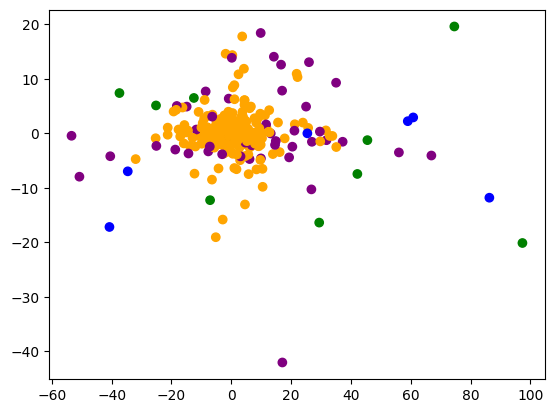

In [30]:
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict]
#去选择任意两个特征来看聚类的图，可以自行调整
plt.scatter(x[:, 2], x[:, 20], color=colr)


In [31]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

0.6086912826041859

In [32]:
#改为2时的结果
km = KMeans(n_clusters=6)
km.fit(x)  #开始训练
predict = km.predict(x)
print(silhouette_score(x, predict))
predict

0.5017287377883153


D:\PY\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 5, 1, 0, 1, 1, 4, 5, 1, 1, 1, 5, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 5, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 5, 1, 1, 0, 1, 1,
       1, 1, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [33]:
# 通过分类后数据，去看原始样本的特点
cross.iloc[0]

aisle
air fresheners candles           0
asian foods                      0
baby accessories                 0
baby bath body care              0
baby food formula                0
                                ..
trash bags liners                0
vitamins supplements             0
water seltzer sparkling water    0
white wines                      0
yogurt                           1
Name: 1, Length: 134, dtype: int64

In [34]:
predict[26]
cross.iloc[26]

aisle
air fresheners candles             0
asian foods                        4
baby accessories                   0
baby bath body care                0
baby food formula                  0
                                ... 
trash bags liners                  0
vitamins supplements               0
water seltzer sparkling water     92
white wines                        0
yogurt                           150
Name: 27, Length: 134, dtype: int64

In [35]:
#改为3时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)


D:\PY\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6377392240924531